************************************************************************************************************************
**Project**      : News Articles Text Classification using Bag of Words Model

**Notebook Name**: AML-news-classification.ipynb    

**Developed by** : Kushal Kokje (kkokje@iu.edu) , 
               Udit   Patel (udipatel@iu.edu)
               
**Date**         : 11-05-2016
    
**History of changes :** 
    
**Author**          ||||||      **Date**       ||||||  **Comments**

Kushal Kokje    ||||||      11/05/2016 ||||||   Initial Version

************************************************************************************************************************

In [28]:
# Import libraries need for loading the dataset into the Pyhton datasets class object

import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np

In [29]:
# set the train and test file path
bbcfilespath     = "C:\\Users\\Kushal Kokje\\Documents\\bbc"
# bbctestfilespath = "C:\\Users\\Kushal Kokje\\Documents\\test"
bbcdataset = datasets.load_files(bbcfilespath,encoding = 'utf-8',decode_error = 'ignore')




In [30]:
# traindata = datasets.load_files(bbcfilespath,encoding = 'utf-8',decode_error = 'ignore')

In [31]:
# len(traindata.data)

In [32]:
# print("\n".join(traindata.data[0].split("\n")[:3]))
# traindata.target[0:10]

In [33]:
CountVect = CountVectorizer()
Vectorized_data = CountVect.fit_transform(bbcdataset.data)

In [34]:
Vectorized_data.shape

(2225, 29421)

In [35]:
tf = TfidfTransformer(use_idf=False).fit(Vectorized_data)
Vectorized_data_tf = tf.transform(Vectorized_data) 
Vectorized_data_tf.shape

(2225, 29421)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Vectorized_data_tf, bbcdataset.target, test_size=0.2, random_state=0)

In [51]:
X_train

<1780x29421 sparse matrix of type '<class 'numpy.float64'>'
	with 361859 stored elements in Compressed Sparse Row format>

In [52]:
from collections import Counter
Counter(y_train)

Counter({0: 408, 1: 302, 2: 339, 3: 408, 4: 323})

In [53]:
Counter(y_test)

Counter({0: 102, 1: 84, 2: 78, 3: 103, 4: 78})

In [54]:
bbcdataset.target_names

['business', 'entertainment', 'politics', 'sport', 'tech']

In [55]:
from sklearn import tree


In [56]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(X_train,y_train)

In [57]:
tree_predict = tree_clf.predict(X_test) 

In [70]:
np.mean(y_test == tree_predict)

0.80224719101123598

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(tree_clf, X_train, y_train, cv=10)

array([ 0.8       ,  0.82222222,  0.8603352 ,  0.81460674,  0.78651685,
        0.79213483,  0.80337079,  0.82022472,  0.80113636,  0.76      ])

In [73]:
# logistic regression 

from sklearn.linear_model import LogisticRegression

In [74]:
LR_clf = LogisticRegression()
_ = LR_clf.fit(X_train,y_train)

In [75]:
LR_predict = LR_clf.predict(X_test)

In [76]:
np.mean(LR_predict== y_test)

0.92808988764044942

In [77]:
cross_val_score(LR_clf, X_train, y_train, cv=10)


array([ 0.91666667,  0.93888889,  0.94972067,  0.86516854,  0.92134831,
        0.91573034,  0.92696629,  0.93258427,  0.91477273,  0.91428571])

In [78]:
# Using Bagging approach , random forrest classfier
from sklearn.ensemble import RandomForestClassifier

In [79]:
randomforrest_clf = RandomForestClassifier()
_ = randomforrest_clf.fit(X_train,y_train)

In [80]:
randomforrest_predict = randomforrest_clf.predict(X_test)

In [82]:
np.mean(randomforrest_predict == y_test)

0.86741573033707864

In [84]:
cross_val_score(randomforrest_clf, X_train, y_train, cv=10)

array([ 0.80555556,  0.89444444,  0.89944134,  0.88202247,  0.87640449,
        0.91011236,  0.91573034,  0.87640449,  0.88636364,  0.87428571])

In [87]:
# incresing the number of trees to 100 from default 10
randomforrest_clf = RandomForestClassifier(n_estimators = 100)
_ = randomforrest_clf.fit(X_train,y_train)
randomforrest_predict = randomforrest_clf.predict(X_test)
np.mean(randomforrest_predict == y_test)

0.9438202247191011

In [88]:
# using Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

In [89]:
adaboost_clf = AdaBoostClassifier(n_estimators = 500)
_ = adaboost_clf.fit(X_train,y_train)

In [90]:
adaboost_predict = adaboost_clf.predict(X_test)

In [91]:
np.mean(adaboost_predict == y_test)

0.86292134831460676

In [92]:
# with n_estimators  = 100 acuracy is just 80 

In [93]:
# using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
gb_clf = GradientBoostingClassifier(n_estimators = 500)
_ = gb_clf.fit(X_train,y_train)

In [95]:
gb_predict = gb_clf.predict(X_test.toarray())

In [96]:
np.mean(gb_predict == y_test)

0.9550561797752809

In [ ]:
# with n_estimators = default 100 , accuacy is 96.85

In [58]:
# Training Naive Bayes Classifier
nb_clf = MultinomialNB().fit(X_train,y_train)


In [59]:
nb_predict = nb_clf.predict(X_test)

In [60]:
# # testdata = datasets.load_files(bbctestfilespath,categories='business',encoding = 'utf-8',decode_error = 'ignore')
# from sklearn.datasets import fetch_20newsgroups
# testdata = fetch_20newsgroups(subset='test')
# traindata1 =fetch_20newsgroups(subset='train')

In [61]:
# traindata1.target

In [62]:
# testdata.target_names

In [63]:
# X_test = CountVect.transform(testdata.data)
# X_test_tf = tf.transform(X_test)

In [64]:
# print("Hello")

In [65]:
# predicted = nb_clf.predict(X_test_tf)

In [ ]:
# for doc, category in zip(y_test, nb_predict):
#     print('%r => %s' % (bbcdataset.target_names[doc], bbcdataset.target_names[category]))

In [20]:
# actual = testdata.target

In [21]:
# len(actual)

In [22]:
# len(predicted)

In [67]:
np.mean(nb_predict == y_test)        

0.84269662921348309

In [26]:
from sklearn import metrics

In [27]:
print(metrics.classification_report(y_test, nb_predict,
...     target_names=bbcdataset.target_names))

               precision    recall  f1-score   support

     business       0.77      0.98      0.86       102
entertainment       0.97      0.44      0.61        84
     politics       0.99      0.86      0.92        78
        sport       0.74      1.00      0.85       103
         tech       0.97      0.87      0.92        78

  avg / total       0.87      0.84      0.83       445



In [28]:
metrics.confusion_matrix(y_test, nb_predict)

array([[100,   0,   0,   1,   1],
       [ 17,  37,   0,  29,   1],
       [  7,   0,  67,   4,   0],
       [  0,   0,   0, 103,   0],
       [  6,   1,   1,   2,  68]])

In [97]:
scores = cross_val_score(nb_clf,X_train,y_train,cv = 10)

In [98]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.05)


In [100]:
# Tweaking the value of parameter alpha we can achieve greater acuracy , but the model might be prone to overfitting
alpha_values = [1,0.8,0.5,0.1]
score_values = []
for alpha in alpha_values:
    nb_classifier = MultinomialNB(alpha = alpha)
    scores = cross_val_score(nb_classifier,X_train,y_train,cv = 10)
    score_values.append(scores.mean())

In [101]:
for alpha_val,score_val in zip(alpha_values,score_values):
#     score_val = round(score_val*100,2)
    print("Mean score for alpha : %0.2f  =  %0.2f %% " %(alpha_val ,score_val*100))

    
# as seen the accuracy increases as the value of alpha keeps decresing , But the it is more prone to overfitting .

Mean score for alpha : 1.00  =  81.56 % 
Mean score for alpha : 0.80  =  83.13 % 
Mean score for alpha : 0.50  =  87.63 % 
Mean score for alpha : 0.10  =  96.12 % 


In [102]:
score_list = ['accuracy','f1_macro','precision_macro','recall_macro']
             
score_values = []
for score_val in score_list:
    nb_classifier = MultinomialNB(alpha = 0.5)
    scores = cross_val_score(nb_classifier,X_train,y_train,cv = 10,scoring = score_val)
    score_values.append(scores.mean())

In [104]:
for score_param,accuracy in zip(score_list,score_values):
    print("Mean score using scoring parameter %s  =  %0.2f %% " %(score_param ,accuracy*100))

Mean score using scoring parameter accuracy  =  87.63 % 
Mean score using scoring parameter f1_macro  =  86.37 % 
Mean score using scoring parameter precision_macro  =  90.73 % 
Mean score using scoring parameter recall_macro  =  85.93 % 


In [ ]:
# since the data set is balanced for the target class , the accuracy and f1_macro scores are almost same

In [308]:
# using SVM classifier with SGD training
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

In [33]:
from sklearn import linear_model
# svm_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)

In [34]:
svm_clf = linear_model.SGDClassifier(loss='hinge', penalty='l2',
...                                            alpha=1e-3, n_iter=5, random_state=42)

In [35]:
_ = svm_clf.fit(X_train,y_train)


In [36]:
svm_predict = svm_clf.predict(X_test)

In [29]:
# predicted
# actual = testdata.target

In [37]:
np.mean(y_test == svm_predict)  

0.9550561797752809

In [31]:
from sklearn import metrics

In [38]:
print(metrics.classification_report(y_test, svm_predict,
...     target_names=bbcdataset.target_names))

               precision    recall  f1-score   support

     business       0.95      0.92      0.94       102
entertainment       0.99      0.92      0.95        84
     politics       0.92      0.99      0.95        78
        sport       0.99      0.98      0.99       103
         tech       0.93      0.97      0.95        78

  avg / total       0.96      0.96      0.96       445



In [39]:
metrics.confusion_matrix(y_test, svm_predict)

array([[ 94,   0,   5,   0,   3],
       [  3,  77,   2,   0,   2],
       [  0,   0,  77,   1,   0],
       [  1,   0,   0, 101,   1],
       [  1,   1,   0,   0,  76]])

In [48]:
from sklearn.model_selection import GridSearchCV

In [40]:
# parameters = {'vect_ngram_range': [(1, 1), (1, 2)],
# ...               'tfidf_use_idf': (True, False),
# ...               'clf_alpha': (1e-2, 1e-3),
# ... }

In [50]:
# new20traindata = twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

In [51]:
# len(new20traindata.data)

11314

In [52]:
# X_train = CountVect.fit_transform(new20traindata.data)

In [53]:
# X_train.shape


(11314, 130107)

In [54]:
# CountVect.vocabulary_.get(u'algorithm')

27366

In [55]:
# tf_transformer = TfidfTransformer()
# X_train_tfidf = tf_transformer.fit_transform(X_train)
# X_train_tfidf.shape

(11314, 130107)

In [56]:
# X_train_tf

<1754x26540 sparse matrix of type '<class 'numpy.float64'>'
	with 351949 stored elements in Compressed Sparse Row format>

In [57]:
# naivebayes_clf = MultinomialNB().fit(X_train_tfidf, new20traindata.target)

In [58]:
# new20testdata = fetch_20newsgroups(subset='test', shuffle=True, random_state=42) 

In [ ]:
# len(news20testdata.target)

In [ ]:
# X_test = CountVect.transform(news20testdata.data)
# X_test_tfidf = tf_transformer.fit_transform(X_test)

In [ ]:
# news20predicted = naivebayes_clf.predict(X_test_tfidf)

In [ ]:
# len(news20predicted)

In [ ]:
# X_test_tfidf.shape

In [ ]:
# for doc, category in zip(new20testdata.target, news20predicted):
# ...     print('%r => %s' % (news20testdata.target_names[doc], news20testdata.target_names[category]))

In [ ]:
# np.mean(news20predicted == new20testdata.target)  

In [66]:
# from sklearn.linear_model import SGDClassifier
# from sklearn.pipeline import Pipeline
# text_clf = Pipeline([('vect', CountVectorizer()),
#                       ('tfidf', TfidfTransformer()),
#                       ('clf', SGDClassifier(loss='hinge', penalty='l2',
#                                             alpha=1e-2, n_iter=5, random_state=42)),
# ])
# _ = text_clf.fit(new20traindata.data, new20traindata.target)
# predicted = text_clf.predict(new20testdata.data)
# np.mean(predicted == new20testdata.target)            


0.82209240573552844

In [ ]:
# from sklearn import metrics
# print(metrics.classification_report(news20testdata.target,predicted,target_names =new20traindata.target_names ))

In [ ]:
# metrics.confusion_matrix(news20testdata.target,predicted)

In [45]:
from sklearn.model_selection import GridSearchCV


In [57]:
parameters = {'alpha': (0.00001, 0.000001,0.0001 ),'penalty': ('l2', 'elasticnet'),'n_iter': (10, 50, 80)}

In [58]:
gs_svm_clf = GridSearchCV(svm_clf, parameters, n_jobs=-1)

In [59]:
gs_svm_clf = gs_svm_clf.fit(X_train, y_train)

In [60]:
type(gs_svm_clf)

sklearn.model_selection._search.GridSearchCV

In [61]:
gs_svm_clf.best_params_

{'alpha': 1e-05, 'n_iter': 10, 'penalty': 'elasticnet'}

In [62]:
gs_svm_predict = gs_svm_clf.predict(X_test)

In [63]:
np.mean(y_test == gs_svm_predict)

0.9662921348314607

In [64]:
gs_svm_clf.best_score_ 

0.97022471910112362

In [80]:
# >>> for param_name in sorted(parameters.keys()):
# ...     print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 2)


In [65]:
gs_svm_clf.cv_results_

{'mean_fit_time': array([ 0.06115405,  0.27874104,  0.60811679,  2.1092755 ,  0.85627683,
         3.6139435 ,  0.27071985,  0.58940053,  0.5534718 ,  1.87431709,
         0.71389834,  2.85275253,  0.25751829,  0.5142018 ,  0.55932037,
         2.05212386,  0.76369747,  1.91425649]),
 'mean_score_time': array([ 0.00367641,  0.00434526,  0.0046792 ,  0.00401068,  0.00434621,
         0.00434478,  0.00451199,  0.00384355,  0.00434502,  0.00417805,
         0.00417844,  0.00434502,  0.00451183,  0.00451104,  0.00417797,
         0.0040106 ,  0.00451255,  0.00350944]),
 'mean_test_score': array([ 0.96629213,  0.97022472,  0.96741573,  0.96685393,  0.96629213,
         0.96685393,  0.96404494,  0.96179775,  0.96404494,  0.95674157,
         0.96629213,  0.96235955,  0.96292135,  0.96741573,  0.96910112,
         0.96910112,  0.96853933,  0.96910112]),
 'mean_train_score': array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  

In [82]:
# ## pipleline for text feature extraction and evaluation

# from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.linear_model import SGDClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline



In [83]:
# categories = None
# traindata = fetch_20newsgroups(subset='train', categories=categories)

In [84]:
# pipeline = Pipeline([
#     ('vect', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('clf', SGDClassifier()),
# ])

In [85]:
# parameters = {
#     'vect__max_df': (0.5, 0.75, 1.0),
#     #'vect__max_features': (None, 5000, 10000, 50000),
#     'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
#     #'tfidf__use_idf': (True, False),
#     #'tfidf__norm': ('l1', 'l2'),
#     'clf__alpha': (0.00001, 0.000001),
#     'clf__penalty': ('l2', 'elasticnet'),
#     #'clf__n_iter': (10, 50, 80),
# }

In [86]:
# grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)


In [ ]:
# grid_search.fit(traindata.data, traindata.target)

In [ ]:
# sklearn.svm.SVC().get_params()

In [ ]:
# # ROC curve with cross validation 


# from sklearn.datasets import fetch_20newsgroups
# from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# categories = ['sci.med','talk.politics.mideast']
# twenty_train = fetch_20newsgroups(categories = categories)
# X = twenty_train.data
# y = twenty_train.target


In [ ]:
# y

In [ ]:
# twenty_train.target_names

In [ ]:
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(X)
# X_train_counts.shape

In [ ]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# X_train_tf.shape


In [ ]:
# >>> tfidf_transformer = TfidfTransformer()
# >>> X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
# >>> X_train_tfidf.shape
# X = X_train_tfidf

In [ ]:
# n_samples, n_features = X.shape

In [ ]:
# n_samples,n_features

In [ ]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn import svm
# from itertools import cycle
# from sklearn.metrics import roc_curve, auc
# from scipy import interp
# import matplotlib.pyplot as plt
# %matplotlib inline
# import numpy as np




In [ ]:
# cv = StratifiedKFold(n_splits = 6)
# classifier = svm.SVC(kernel='linear', probability=True)

In [ ]:
# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


In [ ]:
# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
# # categories = cycle([i for i in range(20) ])


In [ ]:
# lw = 2
# i = 0

In [ ]:
# for (train,test) ,color in zip(cv.split(X,y),colors):
#     probas_ = classifier.fit(X[train],y[train]).predict_proba(X[test])
#     # Compute ROC curve and area the curve
#     fpr,tpr,thresholds = roc_curve(y[test],probas_[:,1])
#     mean_tpr += interp(mean_fpr, fpr, tpr)
#     mean_tpr[0] = 0.0
#     roc_auc = auc(fpr, tpr)
#     plt.plot(fpr, tpr, lw=lw, color=color,
#              label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
#     i += 1

In [ ]:
# plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
#          label='Luck')

In [ ]:
# mean_tpr /= cv.get_n_splits(X, y)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
#          label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show

In [122]:
from sklearn import svm

In [123]:
parameters  = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
 ]

svr = svm.SVC()
svm_classifier = GridSearchCV(svr, parameters,n_jobs=-1,cv = 5)

NameError: name 'GridSearchCV' is not defined

In [118]:
svm_classifier = svm_classifier.fit(X_train,y_train)

In [119]:
 svm_classifier.best_score_ 

0.96741573033707862

In [125]:
svm_classifier.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>

In [126]:
svm_best_predict = svm_classifier.predict(X_test)

In [ ]:
np.mean(y_test == svm_best_predict)

In [ ]:
# for dect in parameters:
#     for param_name in sorted(dect.keys()):
#         print("%s: %r" % (param_name, svm_classifier.best_params_[param_name]))

In [70]:
# K means for bbc dataset
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans,MiniBatchKMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics





In [71]:
# bbcfilespath =  "C:\\Users\\Kushal Kokje\\Documents\\bbc"
bbcfilespath = "C:\\Users\\Kushal Kokje\\Documents\\bbc-kmeans"


In [72]:
bbcdataset = datasets.load_files(bbcfilespath,encoding = 'utf-8',decode_error = 'ignore')

In [73]:
len(bbcdataset.data)

272

In [74]:
labels = bbcdataset.target
true_k = np.unique(labels).shape[0]
true_k




5

In [75]:
bbcdataset.target_names

['business', 'entertainment', 'politics', 'sport', 'tech']

In [76]:
# X_train, X_test, y_train, y_test = train_test_split(
# ...     bbcdataset.data, bbcdataset.target, test_size=0.4, random_state=0)

In [77]:
# import nltk
# nltk.download('wordnet')

In [78]:
# >>> from nltk import word_tokenize   
# >>> from nltk.corpus import wordnet
# >>> from nltk.stem import WordNetLemmatizer 
# >>> class LemmaTokenizer(object):
# ...     def __init__(self):
# ...         self.wnl = WordNetLemmatizer()
# ...     def __call__(self, doc):
# ...         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
# ...
# # >>> vect = CountVectorizer(tokenizer=LemmaTokenizer())  

In [79]:
hasher = HashingVectorizer(stop_words='english',
                           lowercase=True,non_negative=False, norm='l2',binary=False)
vectorizer = make_pipeline(hasher, TfidfTransformer())



In [80]:
X = vectorizer.fit_transform(bbcdataset.data)
# X = vectorizer.fit_transform(X_test)

In [81]:
X.shape # y_test is the target

(272, 1048576)

In [82]:
km = KMeans(n_clusters=true_k,n_jobs=-1)#, init='k-means++', max_iter=100, n_init=1,verbose=5,n_jobs=-1)

In [83]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [84]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))

Homogeneity: 0.606


In [85]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

Homogeneity: 0.606
Completeness: 0.654
V-measure: 0.629
Adjusted Rand-Index: 0.493
Silhouette Coefficient: 0.017


In [86]:
clusters = km.labels_.tolist()

In [87]:
bbcdataset.target[0]

4

In [88]:
bbcdataset.target_names

['business', 'entertainment', 'politics', 'sport', 'tech']

In [89]:
print(km.labels_[:10])

[1 1 4 2 1 4 3 4 3 1]


In [90]:
print(bbcdataset.target[:10])

[4 4 3 2 4 3 1 3 1 4]


In [91]:
cnt = [ a for a, b in zip(list(km.labels_),list(bbcdataset.target)) if a != b ] 
    

In [92]:
list(km.labels_[:10])

[1, 1, 4, 2, 1, 4, 3, 4, 3, 1]

In [93]:
len(cnt)

223

In [94]:
bbcdataset.target_names

['business', 'entertainment', 'politics', 'sport', 'tech']

In [95]:
from sklearn.externals import joblib

In [96]:
joblib.dump(km,  'doc_cluster.pkl')

['doc_cluster.pkl']

In [97]:
km = joblib.load('doc_cluster.pkl')

In [98]:
clusters = km.labels_.tolist()

In [99]:
filenames = bbcdataset.filenames


In [100]:
titles = []
# titles = X_

for title in filenames:
    t = title.split("\\")[-2:]
    s = "".join(t)
    titles.append(s)

In [101]:
filedata = bbcdataset.data

In [102]:
len(filedata)

272

In [103]:
import pandas as pd

In [104]:
films = { 'title': titles, 'textdata': filedata, 'cluster': clusters }

frame = pd.DataFrame(films, index = [clusters] , columns = ['title', 'cluster'])

In [105]:
frame['cluster'].value_counts() 

1    91
2    74
3    49
4    41
0    17
Name: cluster, dtype: int64

In [106]:
a = pd.Series(bbcdataset.target)

In [107]:
a.value_counts()

3    58
1    58
4    55
2    52
0    49
dtype: int64

In [108]:
b = pd.Series(clusters)

In [109]:
b.value_counts()

1    91
2    74
3    49
4    41
0    17
dtype: int64

In [110]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

In [111]:
for i in range(5):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace

Cluster 0 words:

NameError: name 'vocab_frame' is not defined

In [112]:
# MDS 

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

In [113]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

In [114]:
MDS()

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=None, verbose=0)

In [115]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

In [116]:
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

In [117]:
xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [118]:

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'Business', 
                 1: 'Politics', 
                 2: 'Tech', 
                 3: 'Entertainment', 
                 4: 'Sports'}

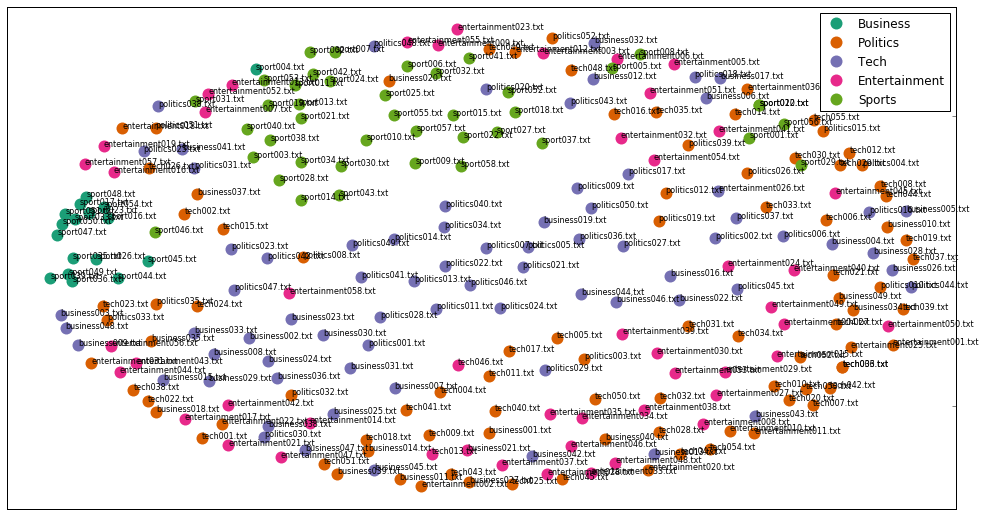

In [119]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

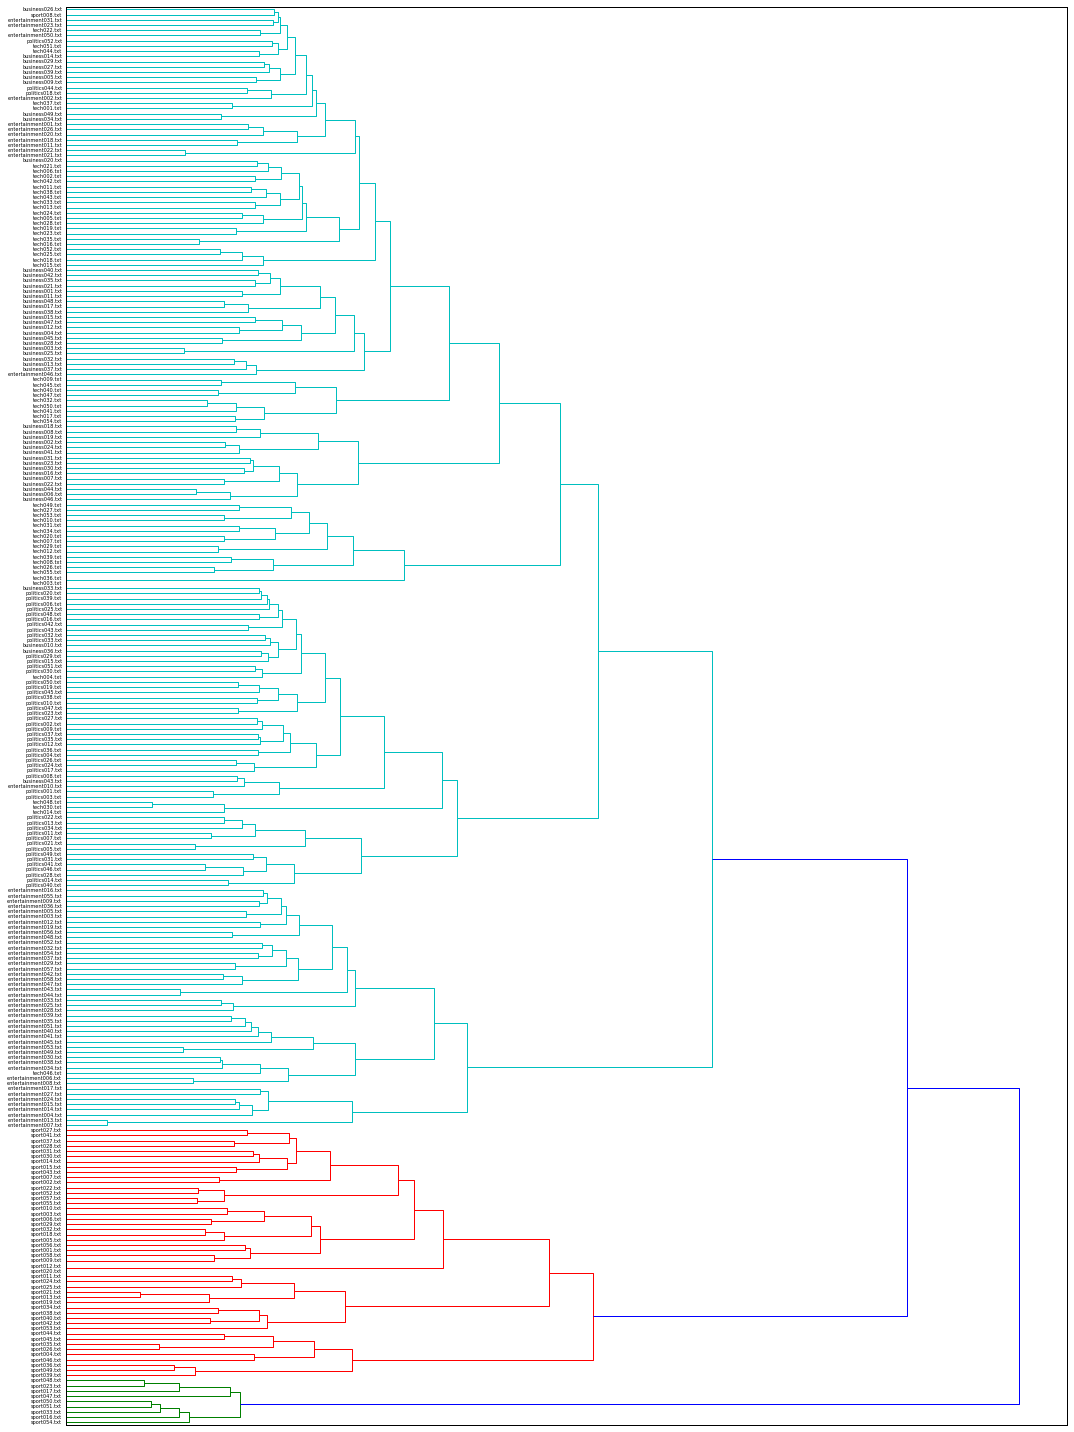

In [120]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=400) #save figure as ward_clusters